## Adegenet

In [127]:
library(adegenet)
library(pegas)
library(hierfstat)
library(ggplot2)
library(dplyr)
library(reshape2)
setwd("/home/ksil91/Projects/Ostrea/over10k-min75H32/")

In [128]:
inputfile = "o10k-min75H32-exRepu.str"
Sys.setenv(IN="o10k-min75H32-exRepu.str")

In [129]:
nloci = -2+as.numeric(system("awk '{print NF}' ${IN} | sort -nu | tail -n 1", intern=TRUE))
nloci

[1] 1791

In [130]:
system("wc -l ${IN}", intern=TRUE)

[1] "425 o10k-min75H32-exRepu.str"

In [131]:
nind = 424/2
nind

[1] 212

In [132]:
ind_data <- read.structure(inputfile, n.ind=nind,n.loc=nloci,onerowperind=FALSE,
                           col.lab=1,col.pop=2,row.marknames=1, ask=FALSE)
ind_data


 Converting data from a STRUCTURE .stru file to a genind object... 



/// GENIND OBJECT /////////

 // 212 individuals; 1,791 loci; 3,601 alleles; size: 3.8 Mb

 // Basic content
   @tab:  212 x 3601 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3601 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.structure(file = inputfile, n.ind = nind, n.loc = nloci, 
    onerowperind = FALSE, col.lab = 1, col.pop = 2, row.marknames = 1, 
    ask = FALSE)

 // Optional content
   @pop: population of each individual (group size range: 9-16)

In [138]:
poptable = read.table("structure_outputs/o10kexRepu_19pop.distruct",header=FALSE)
old_pops <- ind_data@pop
new_pops = {}
for (i in 1:length(old_pops)){
    new_pops[i] = as.character(poptable$V2[match(old_pops[i],poptable$V1)])
}
pop(ind_data) <- new_pops
sum_ind <- summary(ind_data)
names(sum_ind)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

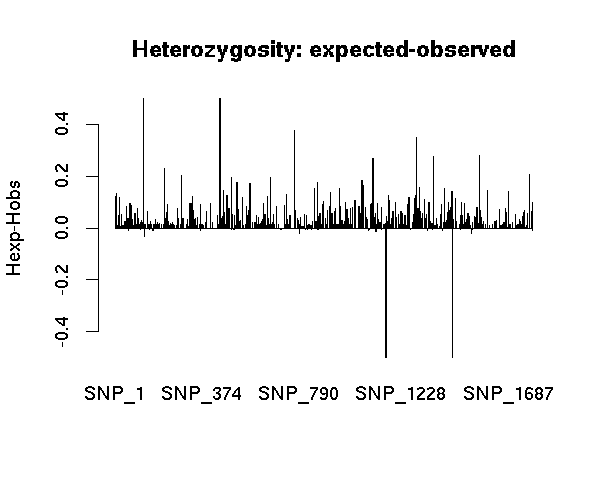

In [140]:
barplot(sum_ind$Hexp-sum_ind$Hobs, main = "Heterozygosity: expected-observed", ylab="Hexp-Hobs")

In [141]:
bartlett.test(list(sum_ind$Hexp,sum_ind$Hobs))
t.test(sum_ind$Hexp,sum_ind$Hobs,pair=T,var.equal=TRUE,alter="greater")


	Bartlett test of homogeneity of variances

data:  list(sum_ind$Hexp, sum_ind$Hobs)
Bartlett's K-squared = 54.553, df = 1, p-value = 1.513e-13



	Paired t-test

data:  sum_ind$Hexp and sum_ind$Hobs
t = 12.816, df = 1790, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.01046427        Inf
sample estimates:
mean of the differences 
             0.01200597 


Observed H is significantly lower than mean expected H.

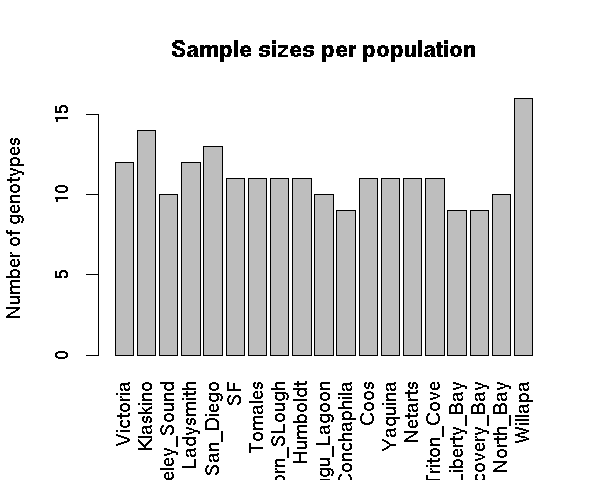

In [142]:
options(repr.plot.width=5,repr.plot.height=4)
barplot(sum_ind$n.by.pop, main="Sample sizes per population", ylab="Number of genotypes",las=3)

In [143]:
sum_ind$NA.perc

[1] 24.18434

In [144]:
pop_data <- genind2genpop(ind_data)
pop_data


 Converting data from a genind to a genpop object... 

...done.



/// GENPOP OBJECT /////////

 // 19 populations; 1,791 loci; 3,601 alleles; size: 1.1 Mb

 // Basic content
   @tab:  19 x 3601 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3601 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: genind2genpop(x = ind_data)

 // Optional content
   - empty -

In [145]:
sum_pop <- summary(pop_data)
names(sum_pop)

[1] "n.pop"     "loc.n.all" "pop.n.all" "NA.perc"

In [155]:
popNames(pop_data) 
pop(ind_data)

[1] "Victoria"       "Klaskino"       "Barkeley_Sound" "Ladysmith"     
 [5] "San_Diego"      "SF"             "Tomales"        "Elkhorn_SLough"
 [9] "Humboldt"       "Mugu_Lagoon"    "Conchaphila"    "Coos"          
[13] "Yaquina"        "Netarts"        "Triton_Cove"    "Liberty_Bay"   
[17] "Discovery_Bay"  "North_Bay"      "Willapa"

[1] Victoria       Victoria       Victoria       Victoria       Victoria      
  [6] Victoria       Victoria       Victoria       Victoria       Victoria      
 [11] Victoria       Victoria       Klaskino       Klaskino       Klaskino      
 [16] Klaskino       Klaskino       Klaskino       Klaskino       Klaskino      
 [21] Klaskino       Klaskino       Klaskino       Klaskino       Klaskino      
 [26] Klaskino       Barkeley_Sound Barkeley_Sound Barkeley_Sound Barkeley_Sound
 [31] Barkeley_Sound Barkeley_Sound Barkeley_Sound Barkeley_Sound Barkeley_Sound
 [36] Barkeley_Sound Ladysmith      Ladysmith      Ladysmith      Ladysmith     
 [41] Ladysmith      Ladysmith      Ladysmith      Ladysmith      Ladysmith     
 [46] Ladysmith      Ladysmith      Ladysmith      San_Diego      San_Diego     
 [51] San_Diego      San_Diego      San_Diego      San_Diego      San_Diego     
 [56] San_Diego      San_Diego      San_Diego      San_Diego      San_Diego     
 [61] San_Diego      SF             SF             SF             SF            
 [66] SF             SF             SF             SF             SF            
 [71] SF             SF             Tomales        Tomales        Tomales       
 [76] Tomales        Tomales        Tomales        Tomales        Tomales       
 [81] Tomales        Tomales        Tomales        Elkhorn_SLough Elkhorn_SLough
 [86] Elkhorn_SLough Elkhorn_SLough Elkhorn_SLough Elkhorn_SLough Elkhorn_SLough
 [91] Elkhorn_SLough Elkhorn_SLough Elkhorn_SLough Elkhorn_SLough Humboldt      
 [96] Humboldt       Humboldt       Humboldt       Humboldt       Humboldt      
[101] Humboldt       Humboldt       Humboldt       Humboldt       Humboldt      
[106] Mugu_Lagoon    Mugu_Lagoon    Mugu_Lagoon    Mugu_Lagoon    Mugu_Lagoon   
[111] Mugu_Lagoon    Mugu_Lagoon    Mugu_Lagoon    Mugu_Lagoon    Mugu_Lagoon   
[116] Conchaphila    Conchaphila    Conchaphila    Conchaphila    Conchaphila   
[121] Conchaphila    Conchaphila    Conchaphila    Conchaphila    Coos          
[126] Coos           Coos           Coos           Coos           Coos          
[131] Coos           Coos           Coos           Coos           Coos          
[136] Yaquina        Yaquina        Yaquina        Yaquina        Yaquina       
[141] Yaquina        Yaquina        Yaquina        Yaquina        Yaquina       
[146] Yaquina        Netarts        Netarts        Netarts        Netarts       
[151] Netarts        Netarts        Netarts        Netarts        Netarts       
[156] Netarts        Netarts        Triton_Cove    Triton_Cove    Triton_Cove   
[161] Triton_Cove    Triton_Cove    Triton_Cove    Triton_Cove    Triton_Cove   
[166] Triton_Cove    Triton_Cove    Triton_Cove    Liberty_Bay    Liberty_Bay   
[171] Liberty_Bay    Liberty_Bay    Liberty_Bay    Liberty_Bay    Liberty_Bay   
[176] Liberty_Bay    Liberty_Bay    Discovery_Bay  Discovery_Bay  Discovery_Bay 
[181] Discovery_Bay  Discovery_Bay  Discovery_Bay  Discovery_Bay  Discovery_Bay 
[186] Discovery_Bay  North_Bay      North_Bay      North_Bay      North_Bay     
[191] North_Bay      North_Bay      North_Bay      North_Bay      North_Bay     
[196] North_Bay      Willapa        Willapa        Willapa        Willapa       
[201] Willapa        Willapa        Willapa        Willapa        Willapa       
[206] Willapa        Willapa        Willapa        Willapa        Willapa       
[211] Willapa        Willapa       
19 Levels: Victoria Klaskino Barkeley_Sound Ladysmith San_Diego SF ... Willapa

In [154]:
library("hierfstat")
fstat(ind_data)

ERROR: Error in solve.default(k, meansq): Lapack routine dgesv: system is exactly singular: U[1,1] = 0


In [18]:
fst_loci <- Fst(as.loci(ind_data))

In [ ]:
#Gtest <- gstat.randtest(ind_data, nsim =99)
#Gtest

In [170]:
#Nei FST as imlemented in hierfstat
distFst <- pairwise.fst(ind_data)

Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message in df2genind(tab, ploidy = newPloidy, type = x[[1]]@type, sep = "/"):
“entirely non-type marker(s) deleted”Warning message 

In [169]:
matFst <- as.matrix(distFst, rownames.force=TRUE)
matFst
#distFst
#df <- melt(as.matrix(d), varnames = c("row", "col")
#matFst <- matrix(matFst)
#rownames(matFst) <- popNames(pop_data)

0.0434360429838201
0.0549599612132915
0.0591487636912069
0.0501046094784873
0.03158665114064
0.0440856759867297
0.0644936576926248
0.0401592868040582
0.0748368938755237
0.109387838770465
0.0805401210684068


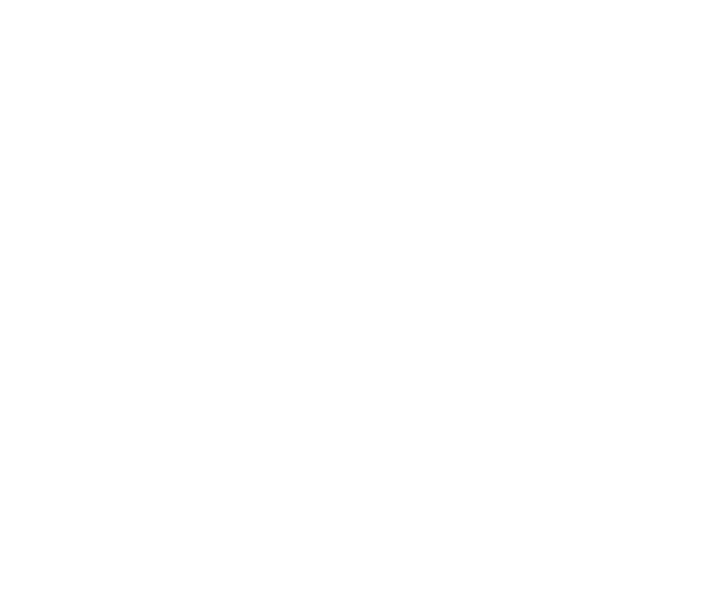

In [36]:
#options(repr.plot.width=6,repr.plot.height=5)
ggplot(data = melted, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient(low = "white", high = "red", 
   name="FST")  + ggtitle(expression(atop("Pairwise FST with O.conchaphila", atop(italic("N = 212, L = 1791"), ""))))+
labs( x = "Sampling Site", y = "Sampling Site") +
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+ coord_fixed()

## PCA

In [172]:
sum(is.na(ind_data$tab))

[1] 184668

In [173]:
scaled <- scaleGen(ind_data, NA.method="mean")

Warning message in .local(x, ...):
“Some scaling values are null.
 Corresponding alleles are removed.”

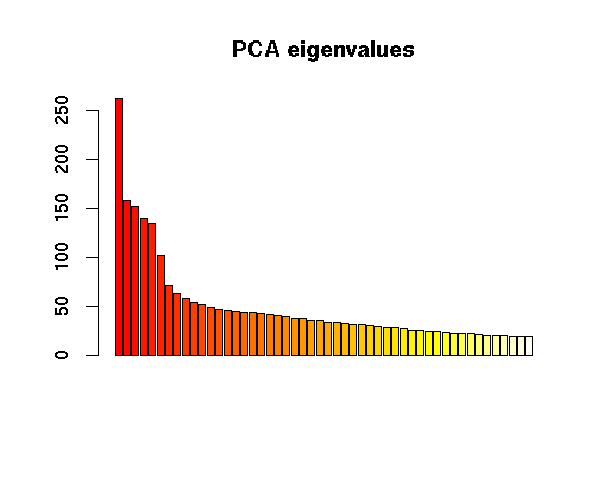

In [174]:
pca1 <- dudi.pca(scaled,cent=FALSE,scale=FALSE,scannf=FALSE,nf=3)
barplot(pca1$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

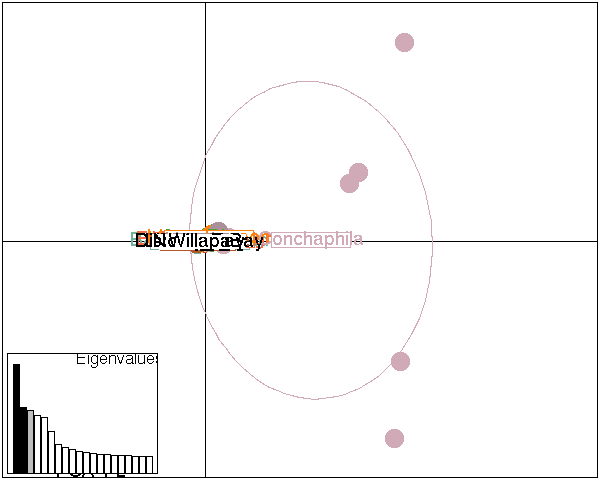

In [186]:
col <- funky(15)
s.class(pca1$li, pop(ind_data),xax=1,yax=2, sub = "PCA 1-2",col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
add.scatter.eig(pca1$eig[1:20],nf=3,xax=1,yax=2)

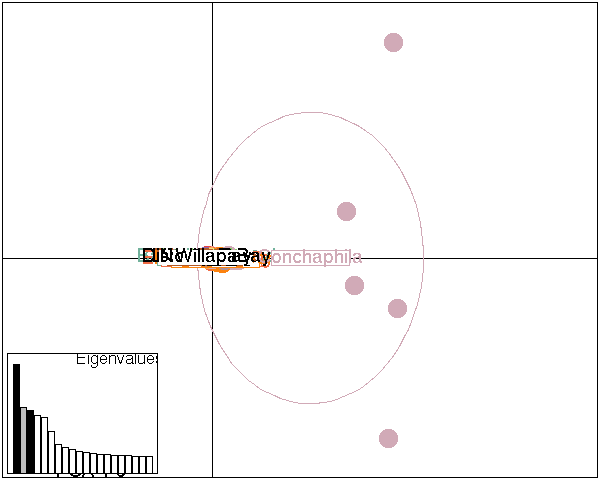

In [187]:
col <- funky(15)
s.class(pca1$li, pop(ind_data),xax=1,yax=3, sub = "PCA 1-3",col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
add.scatter.eig(pca1$eig[1:20],nf=3,xax=1,yax=3)

In [188]:
inputfile = "/home/ksil91/Projects/Ostrea/over10k-min75H32/o10k-min75H32-exRepOLu.str"
Sys.setenv(IN="/home/ksil91/Projects/Ostrea/over10k-min75H32/o10k-min75H32-exRepOLu.str")

In [189]:
nloci = -2+as.numeric(system("awk '{print NF}' ${IN} | sort -nu | tail -n 1", intern=TRUE))
nloci

[1] 1791

In [190]:
system("wc -l ${IN}", intern=TRUE)

[1] "407 /home/ksil91/Projects/Ostrea/over10k-min75H32/o10k-min75H32-exRepOLu.str"

In [191]:
nind = 406/2

In [208]:
ind_data_OL <- read.structure(inputfile, n.ind=nind,n.loc=nloci,onerowperind=FALSE,
                           col.lab=1,col.pop=2,row.marknames=1, ask=FALSE)
ind_data_OL


 Converting data from a STRUCTURE .stru file to a genind object... 



Warning message in df2genind(X = X, pop = pop, ploidy = 2, sep = sep, ncode = ncode):
“entirely non-type marker(s) deleted”

/// GENIND OBJECT /////////

 // 203 individuals; 1,790 loci; 3,265 alleles; size: 3.3 Mb

 // Basic content
   @tab:  203 x 3265 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-3)
   @loc.fac: locus factor for the 3265 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.structure(file = inputfile, n.ind = nind, n.loc = nloci, 
    onerowperind = FALSE, col.lab = 1, col.pop = 2, row.marknames = 1, 
    ask = FALSE)

 // Optional content
   @pop: population of each individual (group size range: 9-16)

In [209]:
poptable = read.table("structure_outputs/o10kexRepu_OL19pop.distruct",header=FALSE)
old_pops <- ind_data_OL@pop
new_pops = {}
for (i in 1:length(old_pops)){
    new_pops[i] = as.character(poptable$V2[match(old_pops[i],poptable$V1)])
}
pop(ind_data_OL) <- new_pops
sum_ind_OL <- summary(ind_data_OL)

In [211]:
pop_data_OL <- genind2genpop(ind_data_OL)
popNames(pop_data_OL)
sum_pop_OL <- summary(pop_data_OL)


 Converting data from a genind to a genpop object... 

...done.



[1] "Victoria"       "Klaskino"       "Barkeley_Sound" "Ladysmith"     
 [5] "San_Diego"      "SF"             "Tomales"        "Elkhorn_SLough"
 [9] "Humboldt"       "Mugu_Lagoon"    "Coos"           "Yaquina"       
[13] "Netarts"        "Triton_Cove"    "Liberty_Bay"    "Discovery_Bay" 
[17] "North_Bay"

Warning message in .local(x, ...):
“Some scaling values are null.
 Corresponding alleles are removed.”

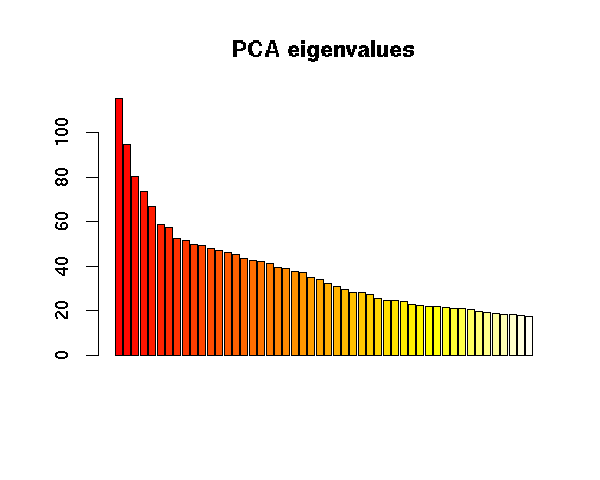

In [212]:
scaled <- scaleGen(ind_data_OL, NA.method="mean")
pca1.OL <- dudi.pca(scaled,cent=FALSE,scale=FALSE,scannf=FALSE,nf=3)
barplot(pca1.OL$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

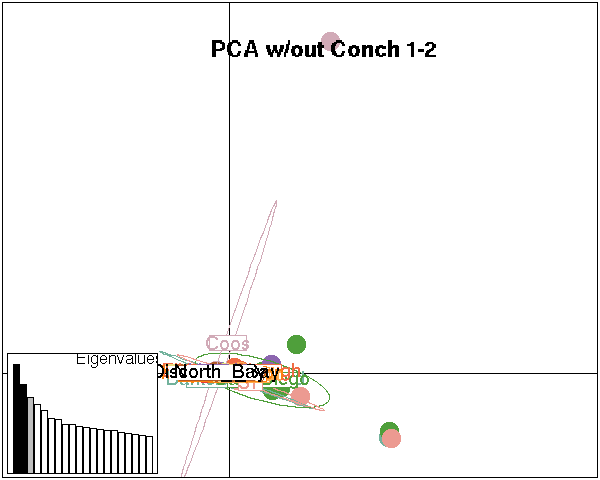

In [213]:
col <- funky(15)
s.class(pca1.OL$li, pop(ind_data_OL),xax=1,yax=2,col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
title("PCA w/out Conch 1-2")
add.scatter.eig(pca1.OL$eig[1:20],nf=3,xax=1,yax=2)

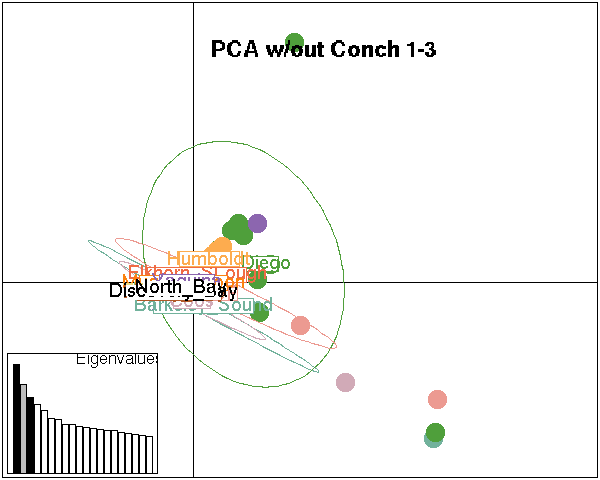

In [214]:
col <- funky(15)
s.class(pca1.OL$li, pop(ind_data_OL),xax=1,yax=3,col=col, axesell=FALSE,
cstar=0, cpoint=3, grid=FALSE)
title("PCA w/out Conch 1-3")
add.scatter.eig(pca1.OL$eig[1:20],nf=3,xax=1,yax=3)

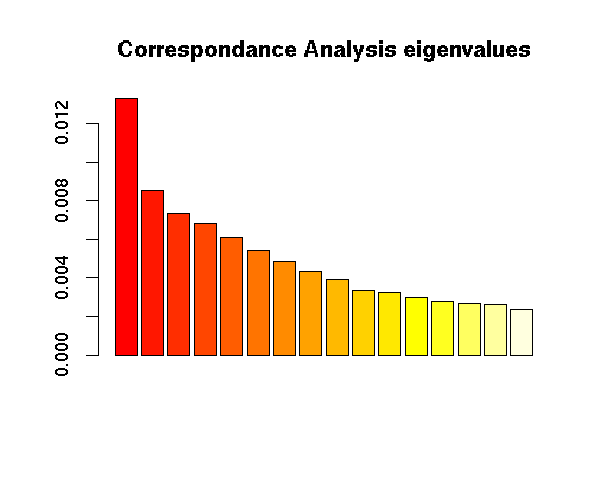

In [215]:
ca1.OL <- dudi.coa(tab(pop_data_OL),scannf=FALSE,nf=3)
barplot(ca1.OL$eig,main="Correspondance Analysis eigenvalues",
col=heat.colors(length(ca1.OL$eig)))

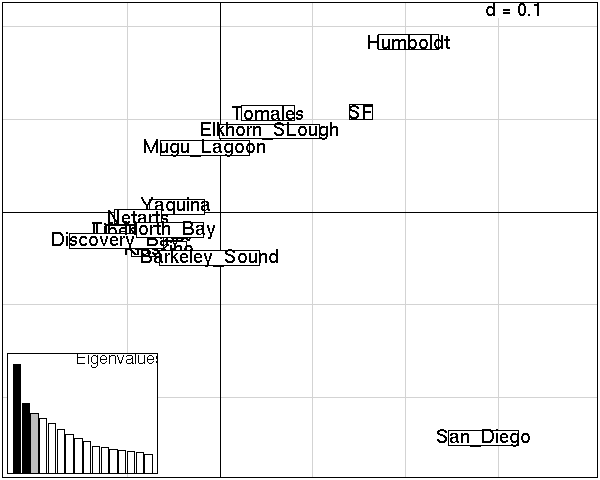

In [222]:
s.label(ca1.OL$li,xax=1,yax=2,lab=popNames(pop_data_OL),csub=2)
add.scatter.eig(ca1.OL$eig,nf=3,xax=1,yax=2,posi="bottomleft")

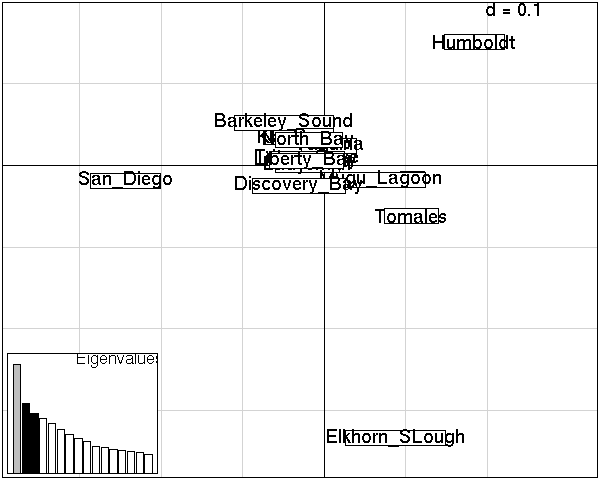

In [224]:
s.label(ca1.OL$li,xax=2,yax=3,lab=popNames(pop_data_OL),csub=2)
add.scatter.eig(ca1.OL$eig,nf=3,xax=2,yax=3,posi="bottomleft")